In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
df = pd.read_csv('../data/Advertising.csv', index_col=0)

In [276]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [277]:
df['total_spend'] = df['Radio']+df['Newspaper']+ df['TV']

<AxesSubplot:xlabel='total_spend', ylabel='Sales'>

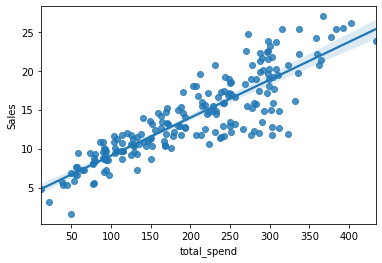

In [278]:
sns.regplot(data = df, x='total_spend', y = 'Sales')

In [279]:
X = df['total_spend']
y = df['Sales']

In [280]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [281]:
potential_spend = np.linspace(0,500,100)

In [282]:
predicted_sales = 0.048688*potential_spend +4.243028

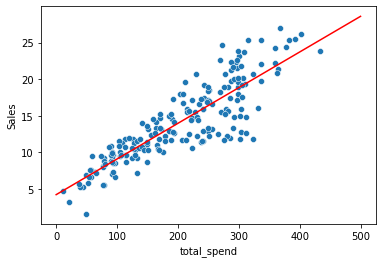

In [283]:
sns.scatterplot(data=df, x='total_spend', y='Sales')
plt.plot(potential_spend, predicted_sales, color='red')

In [284]:
spend= 200
predicted_sales = 0.048688*spend +4.243028
predicted_sales

13.980628

In [285]:
np.polyfit(X,y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [286]:
pot_spend = np.linspace(0,500,100)

In [287]:
pred_sales = 3.076150e-07*pot_spend**3 + -1.893924e-04*pot_spend**2 + 8.208863e-02* pot_spend + 2.704951e+00

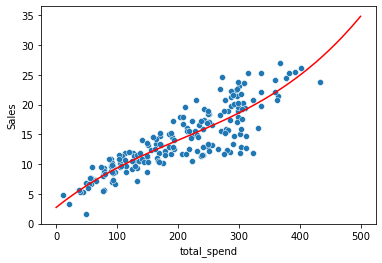

In [288]:
sns.scatterplot(data=df, x='total_spend', y='Sales')
plt.plot(pot_spend, pred_sales, color='red')

In [289]:
######################################################

In [290]:
df = pd.read_csv('../data/Advertising.csv', index_col=0)

Text(0.5, 1.0, 'Newspaper spend')

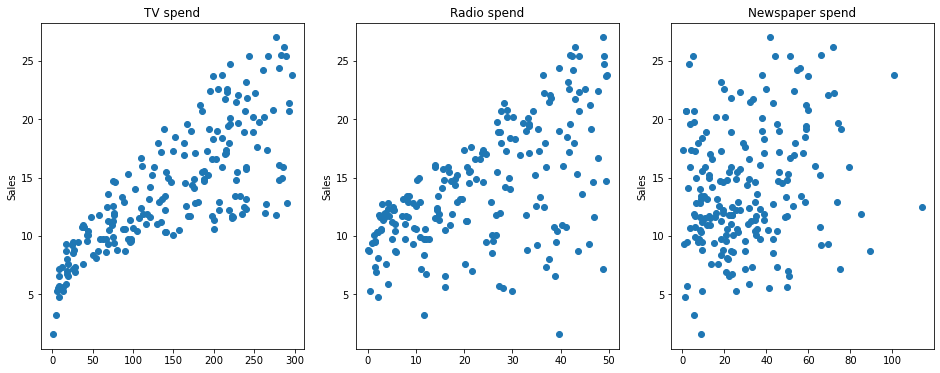

In [291]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

ax[0].plot(df['TV'], df['Sales'], 'o')
ax[0].set_ylabel('Sales')
ax[0].set_title('TV spend')

ax[1].plot(df['Radio'], df['Sales'], 'o')
ax[1].set_ylabel('Sales')
ax[1].set_title('Radio spend')

ax[2].plot(df['Newspaper'], df['Sales'], 'o')
ax[2].set_ylabel('Sales')
ax[2].set_title('Newspaper spend')

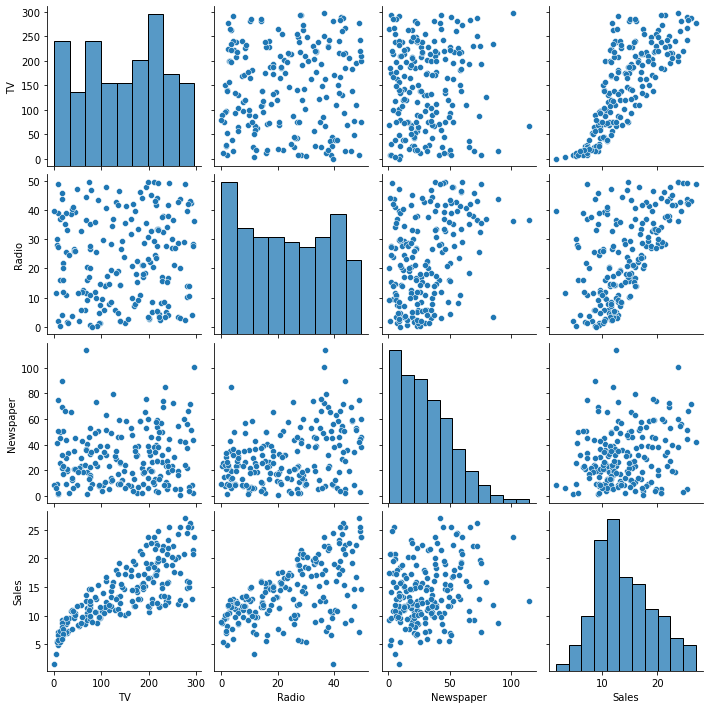

In [292]:
sns.pairplot(df)

In [293]:
X = df.drop('Sales', axis=1)

In [294]:
X

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [295]:
y = df['Sales']

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [298]:
len(X_test)

60

In [299]:
from sklearn.linear_model import LinearRegression

In [300]:
model = LinearRegression()

In [301]:
model.fit(X_train,y_train)

LinearRegression()

In [302]:
pred = model.predict(X_test)

In [303]:
pred

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [304]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [305]:
df['Sales'].mean()

14.0225

<AxesSubplot:xlabel='Sales', ylabel='Count'>

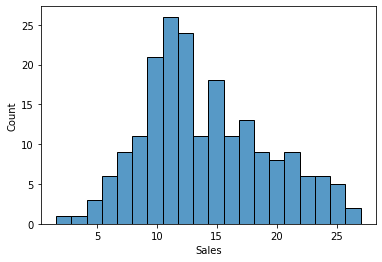

In [306]:
sns.histplot(data=df, x='Sales', bins=20)

In [307]:
mean_absolute_error(y_test, pred)

1.2137457736144803

In [308]:
mean_squared_error(y_test, pred)

2.2987166978863782

In [309]:
test_residuals = y_test - pred

In [310]:
test_residuals

38    -1.041313
110    0.189374
32     0.451111
90    -0.308198
67     0.327143
120   -0.412483
55    -0.089925
75    -0.299540
146    0.524155
143    0.878058
149   -1.505032
113    0.207650
175   -2.225411
56     2.412060
142    0.775434
150    0.118016
26    -3.552290
35     1.810863
171    0.843850
40     1.096888
173   -0.192152
154    0.757859
176    2.313681
62     1.378009
66     1.320379
51    -1.252073
43    -0.769259
130    1.647714
180    0.176840
3     -3.207197
13    -1.577578
134    0.355399
91     1.129731
23    -1.107800
42    -0.214921
33     1.832357
126    1.346067
197    1.421653
159   -3.281056
181   -0.135911
17    -0.510026
187    0.528079
145    1.185301
122   -1.045720
81     0.232893
19     1.216320
79    -3.698066
49    -1.453889
5     -0.339423
16     1.585066
2     -2.097274
44    -1.066159
103   -2.762851
165    0.754630
10    -1.962615
156   -2.308703
37     2.105349
191   -1.824097
34    -1.374000
46    -0.287857
Name: Sales, dtype: float64

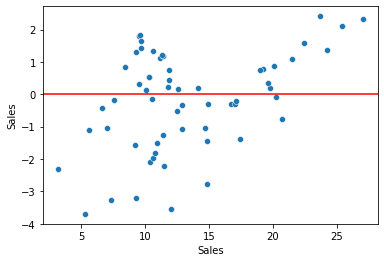

In [311]:
sns.scatterplot(x=y_test, y = test_residuals)
plt.axhline(y=0, color='red', )

C:\Users\pc\anaconda3\envs\ML\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

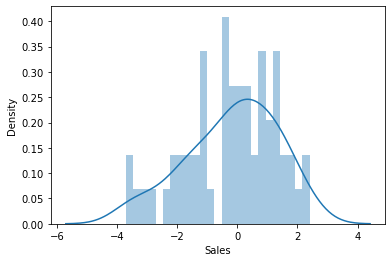

In [312]:
sns.distplot(test_residuals, bins=25, kde=True)

In [313]:
import scipy as sp

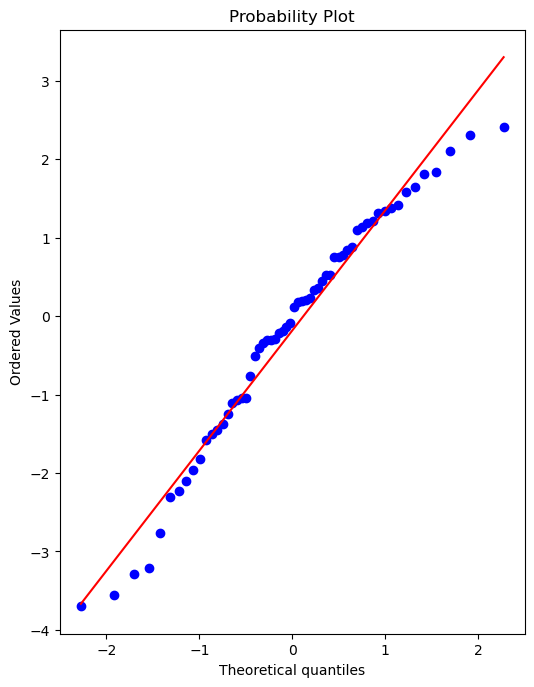

In [314]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

In [315]:
fin_model = LinearRegression()

In [316]:
fin_model.fit(X,y)

LinearRegression()

In [317]:
fin_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [318]:
y_hat = fin_model.predict(X)

Text(0.5, 1.0, 'Newspaper spend')

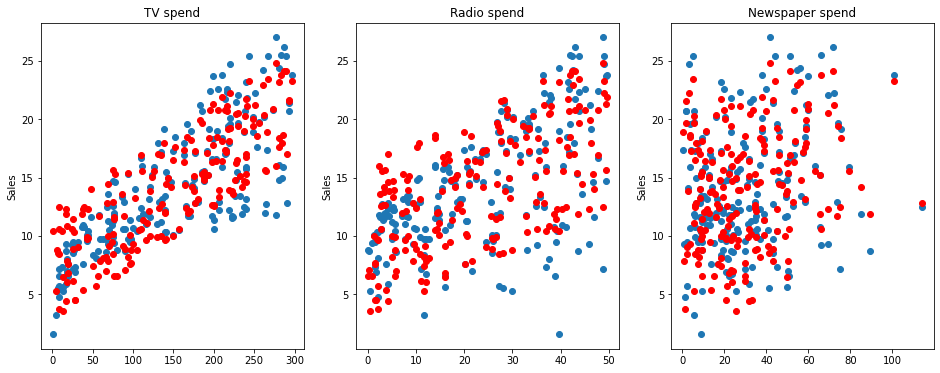

In [319]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

ax[0].plot(df['TV'], df['Sales'], 'o')
ax[0].plot(df['TV'], y_hat, 'o', color='red')
ax[0].set_ylabel('Sales')
ax[0].set_title('TV spend')

ax[1].plot(df['Radio'], df['Sales'], 'o')
ax[1].plot(df['Radio'], y_hat, 'o', color='red')
ax[1].set_ylabel('Sales')
ax[1].set_title('Radio spend')

ax[2].plot(df['Newspaper'], df['Sales'], 'o')
ax[2].plot(df['Newspaper'], y_hat, 'o', color='red')
ax[2].set_ylabel('Sales')
ax[2].set_title('Newspaper spend')

In [320]:
from joblib import dump, load

In [321]:
dump(fin_model, 'model.joblib')

['model.joblib']

In [322]:
loaded_model = load('model.joblib')

In [323]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [324]:
X.shape

(200, 3)

In [325]:
campaign = [[134,43,13]]

In [326]:
loaded_model.predict(campaign)

array([17.16465518])

In [327]:
#poly

In [328]:
df = pd.read_csv('../data/Advertising.csv', index_col=0)

In [329]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [330]:
X = df.drop('Sales', axis=1)

In [331]:
y = df['Sales']

In [332]:
from sklearn.preprocessing import PolynomialFeatures

In [333]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [334]:
poly.fit(X)

PolynomialFeatures()

In [335]:
poly_features = poly.transform(X)

In [336]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [337]:
model = LinearRegression()

In [338]:
model.fit(X_train,y_train)

LinearRegression()

In [339]:
test_predictions = model.predict(X_test)

In [340]:
model.coef_

array([ 0.00000000e+00,  5.17095811e-02,  1.30848864e-02,  1.20000085e-02,
       -1.10892474e-04,  1.14212673e-03, -5.24100082e-05,  3.34919737e-05,
        1.46380310e-04, -3.04715806e-05])

In [341]:
MAE = mean_absolute_error(y_test, test_predictions)

In [343]:
MSE = mean_squared_error(y_test, test_predictions)

In [344]:
RMSE = np.sqrt(MSE)

In [345]:
MAE

0.4896798044803976

In [346]:
RMSE

0.6646431757269406

In [347]:
poly_features[0]

array([1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
       5.294601e+04, 8.697780e+03, 1.592292e+04, 1.428840e+03,
       2.615760e+03, 4.788640e+03])

In [348]:
#######################################

In [349]:
train_rmse_errors = []
test_rmse_errors = []

for a in range(1,10):

    poly_conv = PolynomialFeatures(degree=a, include_bias=True)
    poly_features = poly_conv.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [350]:
train_rmse_errors

[1.7345941243293759,
 0.5879574085292231,
 0.4339344356902069,
 0.4694922218414876,
 0.28120648286552713,
 0.3270938630076892,
 1.5287150046552118,
 0.13814599353043047,
 0.17163680942363063]

In [351]:
test_rmse_errors

[1.5161519375993884,
 0.6646431757269406,
 0.5803286825128451,
 1.2579851965036013,
 3.4579432862969797,
 1.4176527370073138,
 542.2341787305643,
 4122.626993928263,
 94941.68238600093]

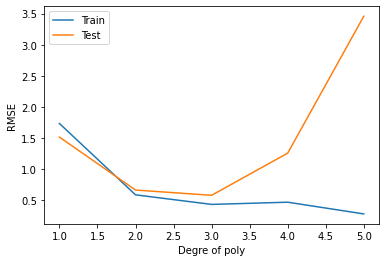

In [353]:
plt.plot(range(1,6), train_rmse_errors[:5], label='Train')
plt.plot(range(1,6), test_rmse_errors[:5], label='Test')
plt.ylabel('RMSE')
plt.xlabel('Degre of poly')
plt.legend()

In [354]:
final_p_converter = PolynomialFeatures(degree=3, include_bias=False)

In [355]:
final_model = LinearRegression()

In [356]:
full_converted_x = final_p_converter.fit_transform(X)
final_model.fit(full_converted_x,y)

LinearRegression()

In [357]:
dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [358]:
dump(final_p_converter, 'final_converter.joblib')

['final_converter.joblib']

In [359]:
camp = [[149,22,12]]

In [361]:
loaded_conv = load('final_converter.joblib')

In [362]:
loaded_model = load('final_model.joblib')

In [363]:
transformed_data = loaded_conv.fit_transform(camp)

In [364]:
loaded_model.predict(transformed_data)

array([14.64501014])